In [48]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import statistics as st
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [49]:
from google.colab import files
uploaded=files.upload()

Saving day.csv to day (5).csv


## Data Cleaning and EDA

In [50]:
data=pd.read_csv('day.csv')

In [51]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [52]:
data.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,0,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,1,1,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,2,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,3,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,4,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [53]:
data.shape

(730, 16)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [55]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [56]:
data.drop_duplicates(inplace=True)

In [57]:
data.drop("instant",axis=1,inplace=True)
data.drop("dteday",axis=1,inplace=True)

In [58]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [59]:
data["year"]=data["yr"]
data["months"]=data["mnth"]
data["humidity"]=data["hum"]
data["counts"]=data["cnt"]

In [60]:
data.drop(["yr","mnth","hum","cnt"],axis=1,inplace=True)

In [61]:
data

,season,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,year,months,humidity,counts
0,1,0,1,1,2,14.110847,18.18125,10.749882,331,654,0,1,80.5833,985
1,1,0,2,1,2,14.902598,17.68695,16.652113,131,670,0,1,69.6087,801
2,1,0,3,1,1,8.050924,9.47025,16.636703,120,1229,0,1,43.7273,1349
3,1,0,4,1,1,8.200000,10.60610,10.739832,108,1454,0,1,59.0435,1562
4,1,0,5,1,1,9.305237,11.46350,12.522300,82,1518,0,1,43.6957,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,5,1,2,10.420847,11.33210,23.458911,247,1867,1,12,65.2917,2114
726,1,0,6,0,2,10.386653,12.75230,10.416557,644,2451,1,12,59.0000,3095
727,1,0,0,0,2,10.386653,12.12000,8.333661,159,1182,1,12,75.2917,1341
728,1,0,1,1,1,10.489153,11.58500,23.500518,364,1432,1,12,48.3333,1796


In [62]:
numerical_fe=data.select_dtypes(exclude="object").columns
print(numerical_fe)

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'windspeed', 'casual', 'registered', 'year', 'months',
       'humidity', 'counts'],
      dtype='object')


In [63]:
data.describe()

,season,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,year,months,humidity,counts
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,12.763620,849.249315,3658.757534,0.500000,6.526027,62.765175,4508.006849
std,1.110184,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,5.195841,686.479875,1559.758728,0.500343,3.450215,14.237589,1936.011647
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,1.500244,2.000000,20.000000,0.000000,1.000000,0.000000,22.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,9.041650,316.250000,2502.250000,0.000000,4.000000,52.000000,3169.750000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,12.125325,717.000000,3664.500000,0.500000,7.000000,62.625000,4548.500000
75%,3.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,15.625589,1096.500000,4783.250000,1.000000,10.000000,72.989575,5966.000000
max,4.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,34.000021,3410.000000,6946.000000,1.000000,12.000000,97.250000,8714.000000


In [64]:
less_count=data[["months","year","weathersit","weekday","workingday","holiday","season"]].columns

In [65]:
#fetch unique values of less then 24
for i in less_count:
    print(i,data[i].unique())

months [ 1  2  3  4  5  6  7  8  9 10 11 12]
year [0 1]
weathersit [2 1 3]
weekday [1 2 3 4 5 6 0]
workingday [1 0]
holiday [0 1]
season [1 2 3 4]


In [66]:
data["season"]=data["season"].map({1:"springer",2:"Summer",3:"fall",4:"Winter"})
data["weekday"]=data["weekday"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
data["weathersit"]=data["weathersit"].map({1:'Clear',2:'Bad',3:'Mist & Cloudy'})
data["months"]=data["months"].map({1:"Jan",2:"Feb",3:"Mar",4:"Apri",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [67]:
data

,season,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,year,months,humidity,counts
0,springer,0,Tue,1,Bad,14.110847,18.18125,10.749882,331,654,0,Jan,80.5833,985
1,springer,0,Wed,1,Bad,14.902598,17.68695,16.652113,131,670,0,Jan,69.6087,801
2,springer,0,Thu,1,Clear,8.050924,9.47025,16.636703,120,1229,0,Jan,43.7273,1349
3,springer,0,Fri,1,Clear,8.200000,10.60610,10.739832,108,1454,0,Jan,59.0435,1562
4,springer,0,Sat,1,Clear,9.305237,11.46350,12.522300,82,1518,0,Jan,43.6957,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,springer,0,Sat,1,Bad,10.420847,11.33210,23.458911,247,1867,1,Dec,65.2917,2114
726,springer,0,Sun,0,Bad,10.386653,12.75230,10.416557,644,2451,1,Dec,59.0000,3095
727,springer,0,Mon,0,Bad,10.386653,12.12000,8.333661,159,1182,1,Dec,75.2917,1341
728,springer,0,Tue,1,Clear,10.489153,11.58500,23.500518,364,1432,1,Dec,48.3333,1796


<Axes: title={'center': 'value count of month'}, xlabel='months', ylabel='counts'>

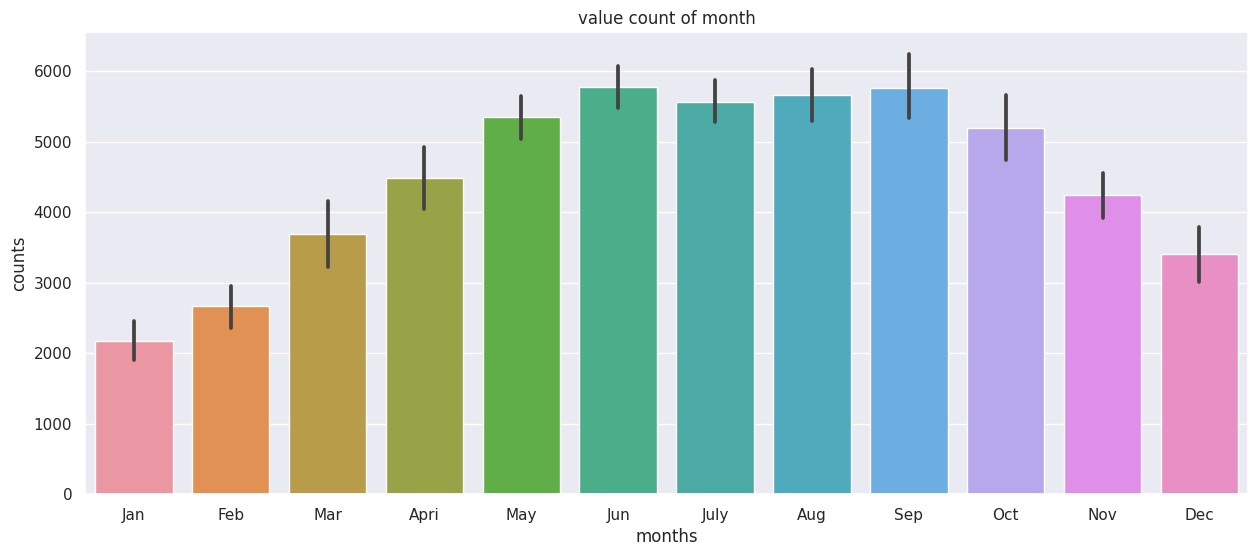

In [68]:
plt.title("value count of month")
sns.barplot(x="months",y="counts",data=data)

<Axes: title={'center': 'value count of year'}, xlabel='year', ylabel='counts'>

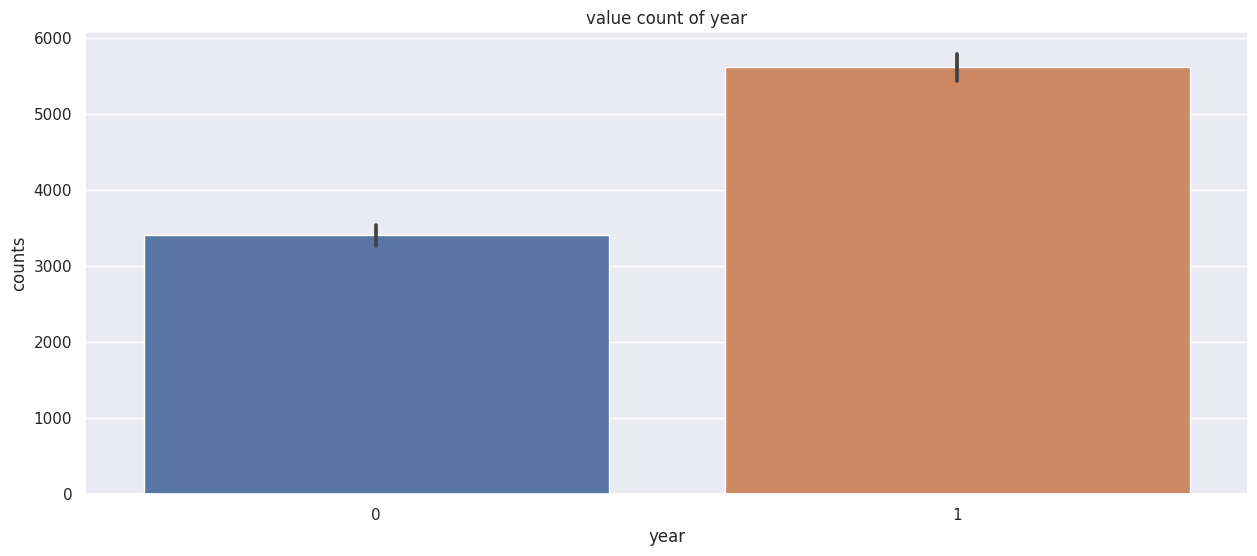

In [69]:
plt.title("value count of year")
sns.barplot(x="year",y="counts",data=data)

0 for 2018 and 1 for 2019

<Axes: title={'center': 'value count of weathersit'}, xlabel='weathersit', ylabel='counts'>

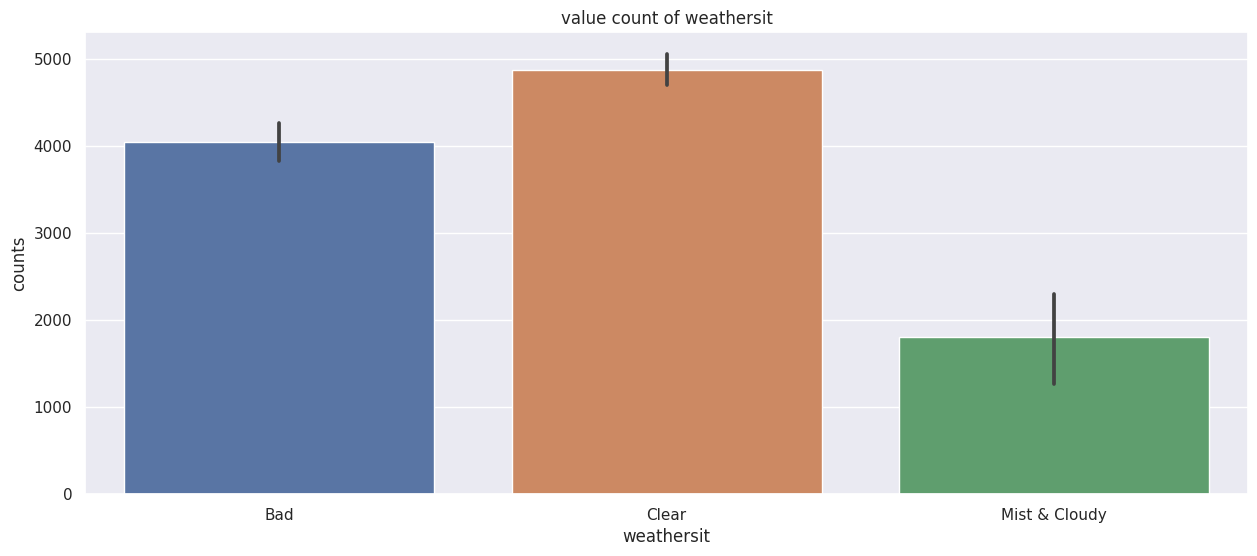

In [70]:
plt.title("value count of weathersit")
sns.barplot(x="weathersit",y="counts",data=data)

<Axes: title={'center': 'value count of workingday'}, xlabel='workingday', ylabel='counts'>

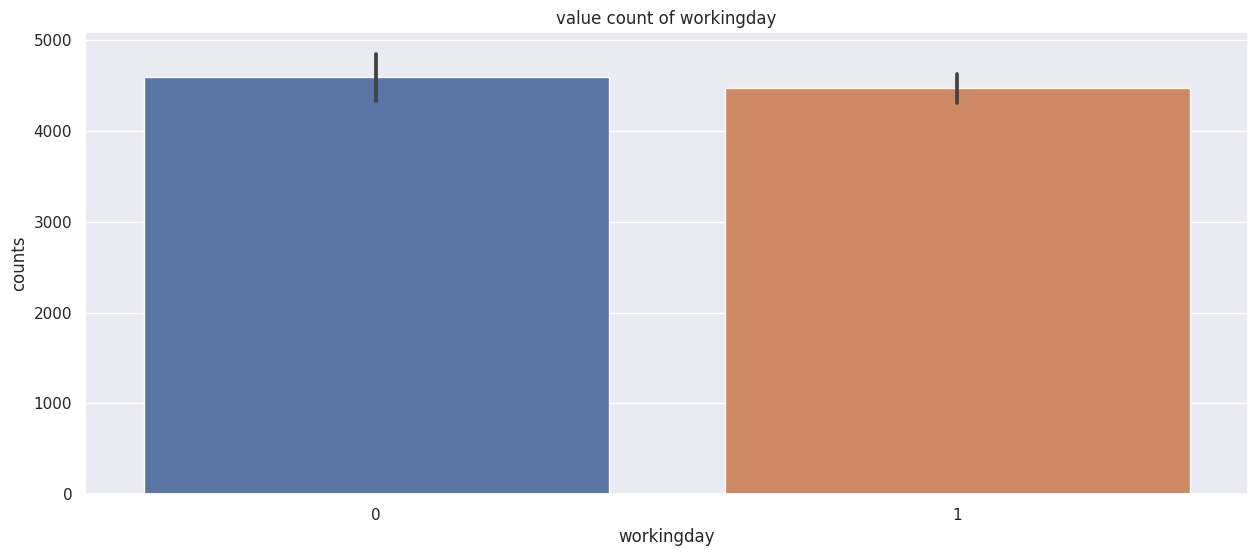

In [71]:
plt.title("value count of workingday")
sns.barplot(x="workingday",y="counts",data=data)

<Axes: title={'center': 'value count of weekday'}, xlabel='weekday', ylabel='counts'>

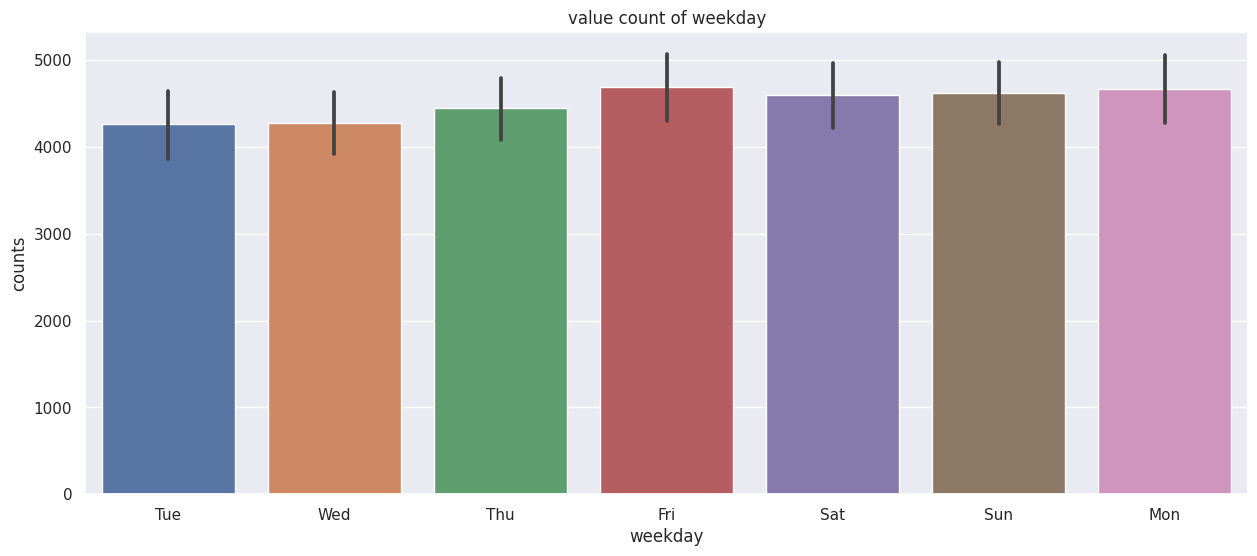

In [72]:
plt.title("value count of weekday")
sns.barplot(x="weekday",y="counts",data=data)

<Axes: title={'center': 'value count of season'}, xlabel='season', ylabel='counts'>

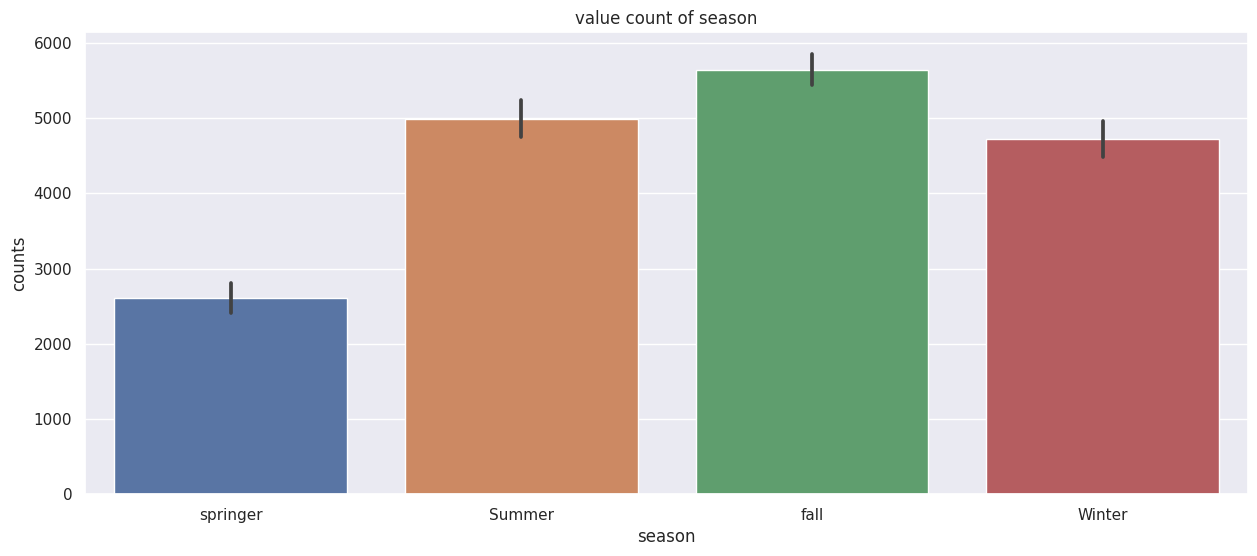

In [73]:
plt.title("value count of season")
sns.barplot(x="season",y="counts",data=data)

<Axes: >

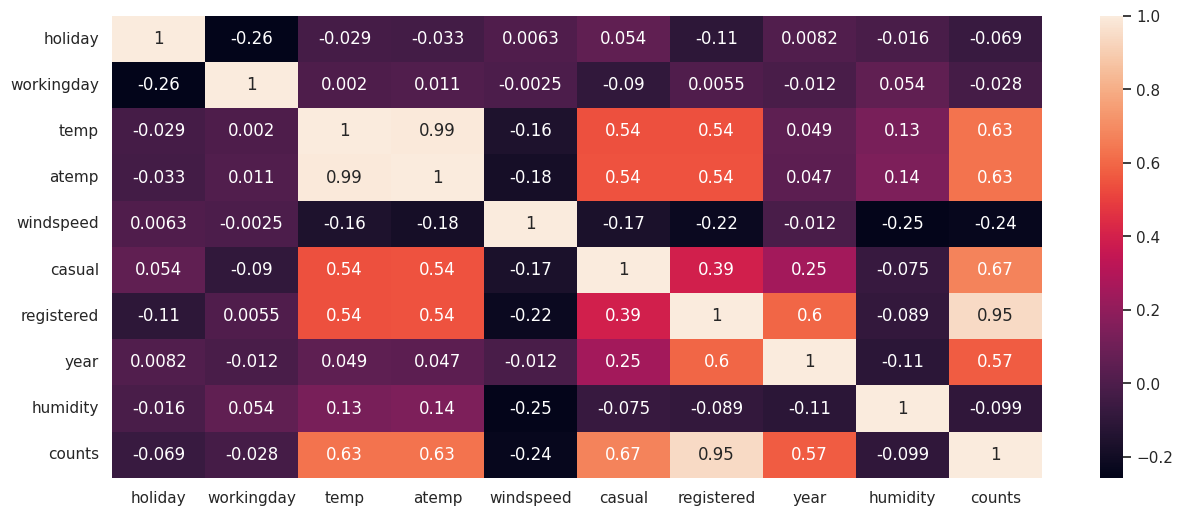

In [74]:
sns.heatmap(data.corr(),annot=True)

In [75]:
# use one hot encoding 
#season=pd.get_dummies(data["season"],prefix="season",drop_first=True)
#week=pd.get_dummies(data["week"],prefix="week",drop_first=True)
#weather=pd.get_dummies(data["weather"],prefix="weather",drop_first=True)
#months=pd.get_dummies(data["months"],prefix="months",drop_first=True)

In [76]:
# concatinate data
#data=pd.concat([data,season,week,weather,months],axis=1)

In [77]:
data.drop(["weathersit","atemp","windspeed","casual","registered"],axis=1,inplace=True)

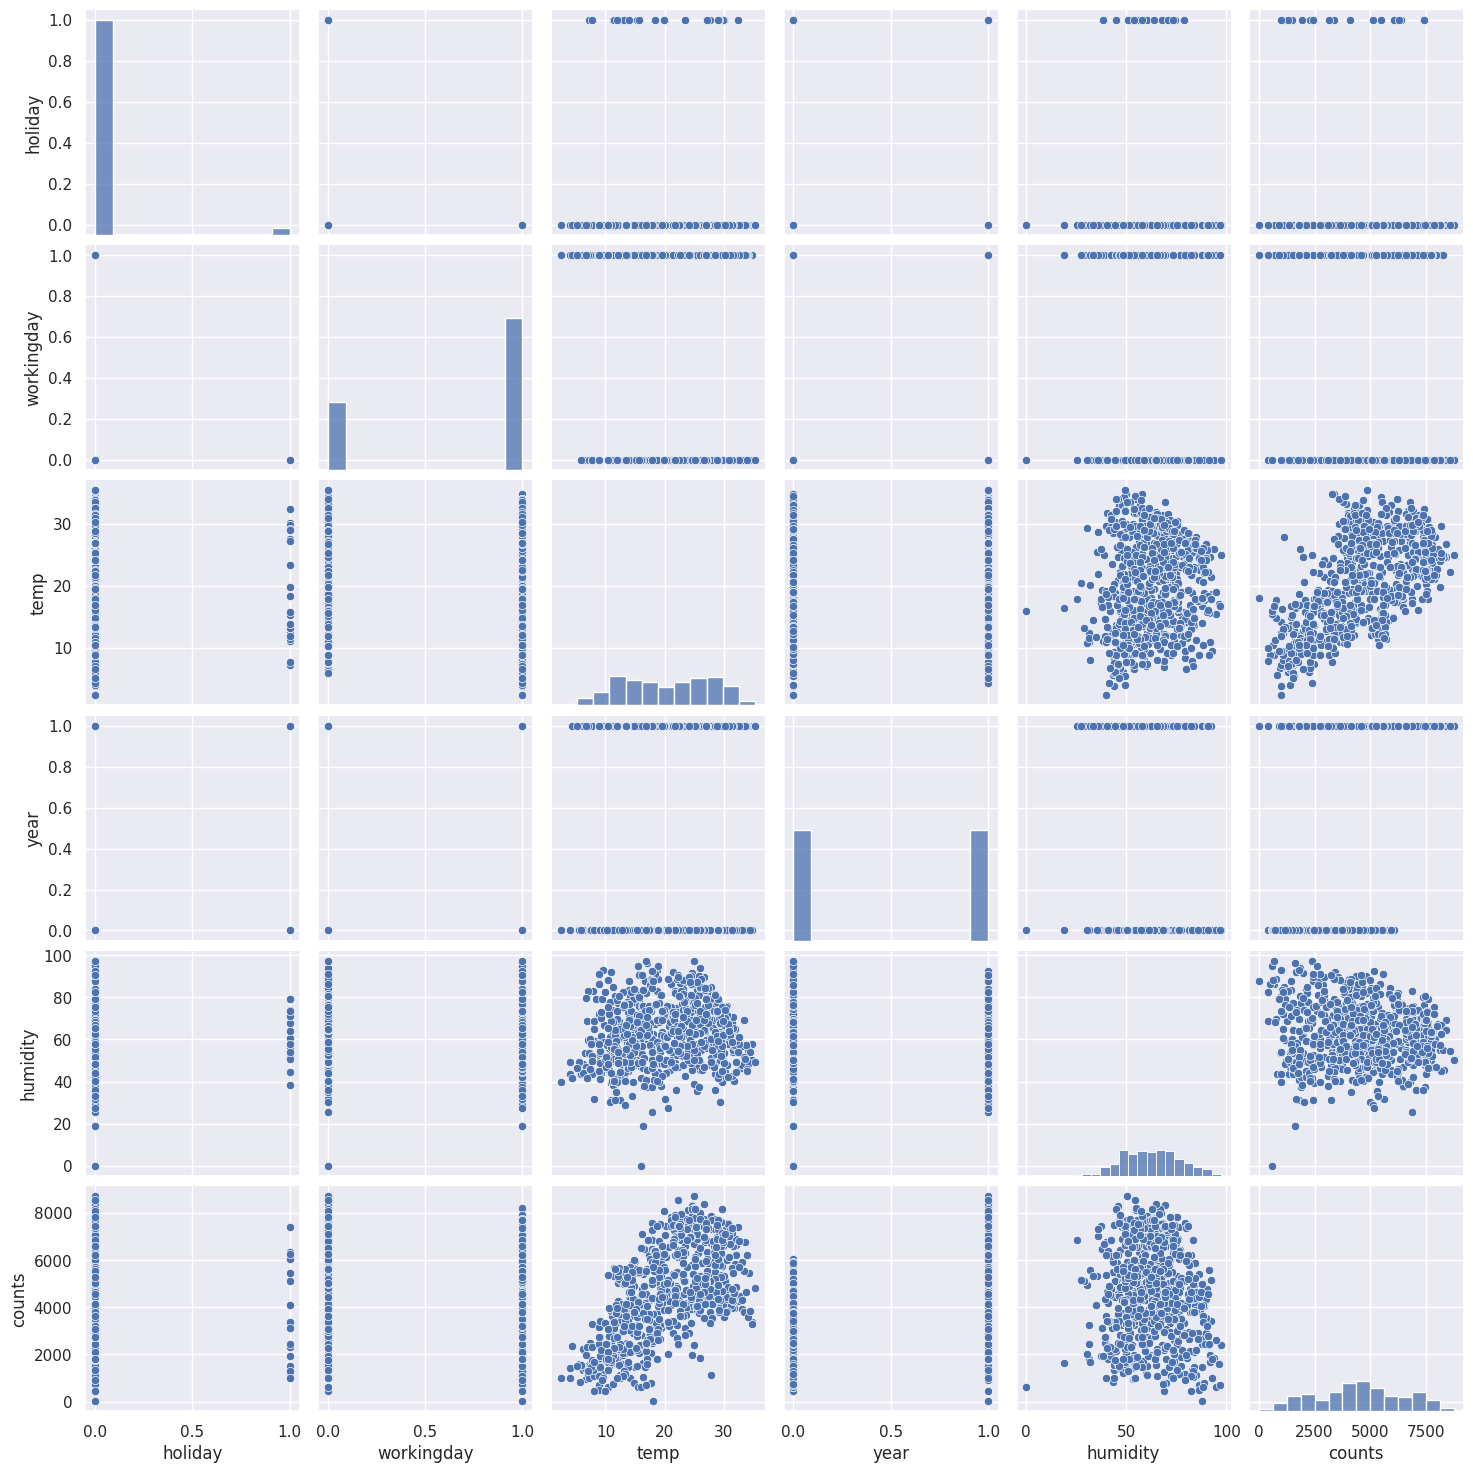

In [78]:
sns.pairplot(data)

In [79]:
catgporical_feature=data.select_dtypes(include="object").columns
print(catgporical_feature)
numeriacal_feature=data.select_dtypes(exclude="object").columns
print(numeriacal_feature)

Index(['season', 'weekday', 'months'], dtype='object')
Index(['holiday', 'workingday', 'temp', 'year', 'humidity', 'counts'], dtype='object')


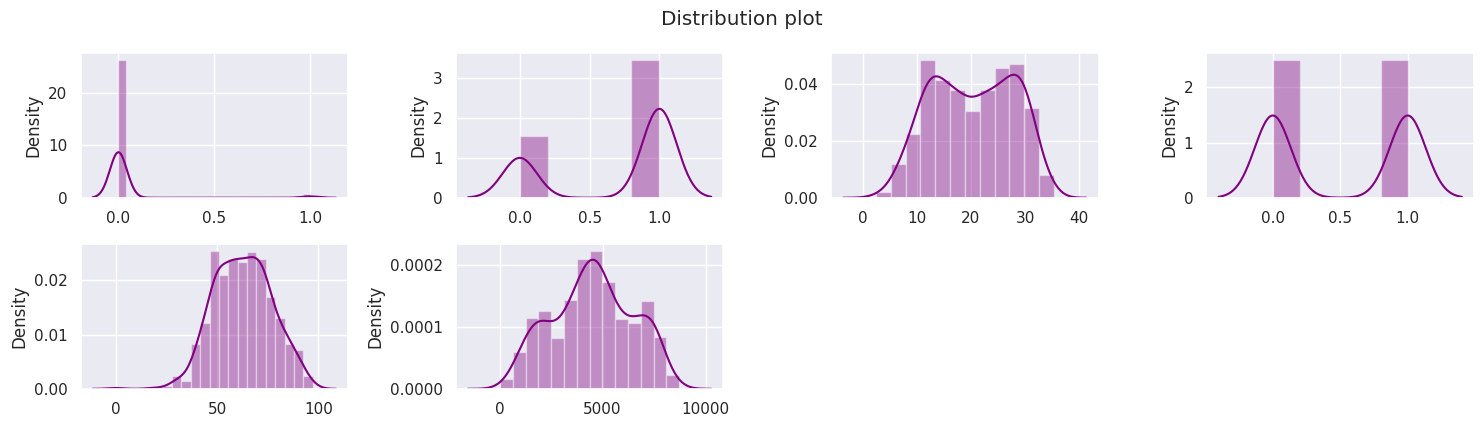

In [80]:
try:
    plt.suptitle("Distribution plot")
    for i in range(0,len(numeriacal_feature)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numeriacal_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

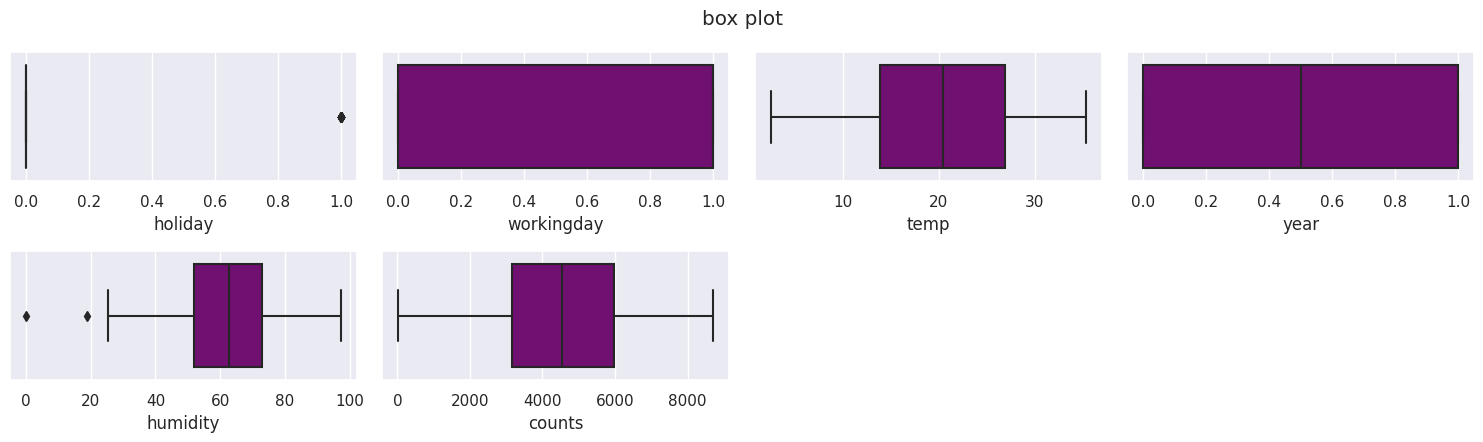

In [81]:
try:
    plt.suptitle("box plot")
    for i in range(0,len(numeriacal_feature)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numeriacal_feature[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

## Model Traning 

In [82]:
data.head()

,season,holiday,weekday,workingday,temp,year,months,humidity,counts
0,springer,0,Tue,1,14.110847,0,Jan,80.5833,985
1,springer,0,Wed,1,14.902598,0,Jan,69.6087,801
2,springer,0,Thu,1,8.050924,0,Jan,43.7273,1349
3,springer,0,Fri,1,8.200000,0,Jan,59.0435,1562
4,springer,0,Sat,1,9.305237,0,Jan,43.6957,1600


In [83]:
data.shape

(730, 9)

In [84]:
#Seprating dependent and indipend features 
x=data.drop("counts",axis=1)
y=data["counts"]

In [85]:
categorical_feature=x.select_dtypes(include="object").columns
numeriacal_feature=x.select_dtypes(exclude="object").columns
print(numeriacal_feature)
print(categorical_feature)

Index(['holiday', 'workingday', 'temp', 'year', 'humidity'], dtype='object')
Index(['season', 'weekday', 'months'], dtype='object')


In [86]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [87]:
# numerical Pipline 
num_pipline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())

    ]
)

#categorical pipline
cato_pipline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoder",OneHotEncoder()),
        ("scaler",StandardScaler(with_mean=False))

    ]
)
 

preprocessor=ColumnTransformer([
    ("num_pipline",num_pipline,numeriacal_feature),
    ("cato_pipline",cato_pipline,categorical_feature)
])

In [88]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [89]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(584, 8)
(584,)
(146, 8)
(146,)


In [90]:
# Transform Data
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.fit_transform(x_test)

In [91]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [92]:
def model_evolution(test,predict):
  mse=mean_squared_error(test,predict)
  mae=mean_absolute_error(test,predict)
  rmse=np.sqrt(mse)
  r2score=r2_score(test,predict)
  return mse,mae,rmse,r2score



In [94]:
models={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(random_state=3)

}

model_list=[]
r2_list=[]
y_predict_list=[]
training_score=[]

for i in range (len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)
  score =model.score(x_train,y_train)
  y_predict=model.predict(x_test)

  mse,mae,rmse,r2score =model_evolution(y_test,y_predict)
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print("Model Traning Performance")
  print("MSE",mse*100)
  print("MAE",mae*100)
  print("RMSE",rmse*100)
  print("R2",r2score*100)
  print("="*40)
  r2_list.append(r2score*100)
  y_predict_list.append(y_predict)
  training_score.append(score)

LinearRegression
Model Traning Performance
MSE 56923981.836653434
MAE 57114.18977790949
RMSE 75447.98329753647
R2 83.36938065876676
RandomForestRegressor
Model Traning Performance
MSE 41500557.2889726
MAE 46669.44520547945
RMSE 64420.926172302585
R2 87.87540947675699


In [95]:
#get the index of the best model
best_model_index=r2_list.index(max(r2_list))

#fetch the best model name and R2 score
best_model_name=model_list[best_model_index]
best_model_r2=r2_list[best_model_index]

#print the best model name and R2 score 
print(f"Best Model:{best_model_name}")
print(f"R2 Score:{best_model_r2}")


Best Model:RandomForestRegressor
R2 Score:87.87540947675699


In [96]:
y_test

468    7460
148    4788
302    3331
355    3068
515    7338
       ... 
404    3830
390    4075
218    3785
135    3958
260    4274
Name: counts, Length: 146, dtype: int64

In [97]:
y_predict_list

[array([6217.38852031, 4446.34365251, 3704.15327778, 1789.77783629,
        7591.88628896, 5066.89753603, 2420.92490945, 2661.13007613,
        3281.63761707, 3292.11489659, 3137.31165633, 5669.38613627,
        2417.36529612, 4843.13518048, 5051.20401307, 3634.52894124,
        5903.84104576, 1699.05068347, 6599.92513277, 4447.67184317,
        4290.98576268, 4946.53191375, 4963.46945456, 5362.68347813,
        4747.93566091, 5446.34867657, 4131.74052032, 1308.99981348,
        4393.08404294, 1732.73009952, 3462.66407842, 3874.49831617,
        1568.29374731, 1921.28438679, 5526.27485374, 5099.00194948,
        3000.79182546, 3537.76501475,  977.68093305, 8007.92836628,
        1931.75145322, 5773.26406649, 5241.60341898, 6699.50842385,
        4099.38240768, 3785.04719071, 6126.4881633 , 5376.96776539,
        4711.16667921, 6540.34907702, 4477.27255076, 4312.275782  ,
        5344.46049759, 5196.30710142, 5430.84622987, 7005.62924683,
        4147.39673146, 6120.58754079, 4430.43645

Text(0, 0.5, 'Predictions')

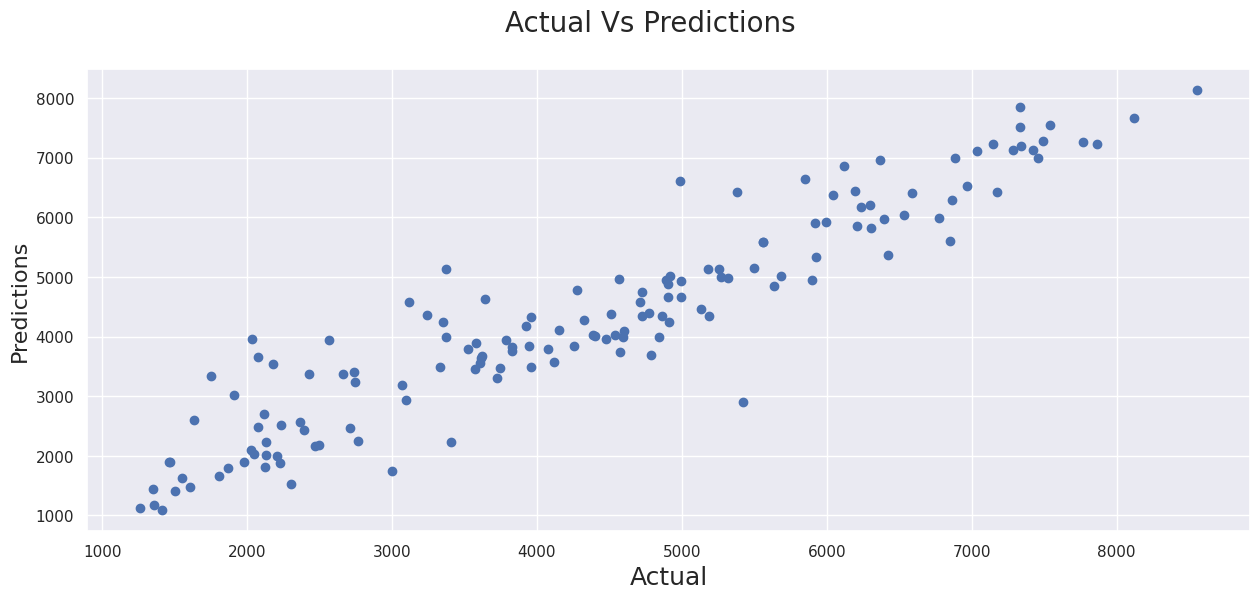

In [104]:
#plotting y_test and y_pred to understand the spread.
fig= plt.figure()
plt.scatter(y_test,y_predict_list[1])
fig.suptitle('Actual Vs Predictions',fontsize=20)
plt.xlabel('Actual',fontsize=18)
plt.ylabel('Predictions',fontsize=16)

In [105]:
training_score

[0.7931636731207425, 0.9786503688752753]

In [106]:
data

,season,holiday,weekday,workingday,temp,year,months,humidity,counts
0,springer,0,Tue,1,14.110847,0,Jan,80.5833,985
1,springer,0,Wed,1,14.902598,0,Jan,69.6087,801
2,springer,0,Thu,1,8.050924,0,Jan,43.7273,1349
3,springer,0,Fri,1,8.200000,0,Jan,59.0435,1562
4,springer,0,Sat,1,9.305237,0,Jan,43.6957,1600
...,...,...,...,...,...,...,...,...,...
725,springer,0,Sat,1,10.420847,1,Dec,65.2917,2114
726,springer,0,Sun,0,10.386653,1,Dec,59.0000,3095
727,springer,0,Mon,0,10.386653,1,Dec,75.2917,1341
728,springer,0,Tue,1,10.489153,1,Dec,48.3333,1796


In [107]:
data.to_csv("bike_rent_prediction.csv",index=False)

In [110]:
# Save the best model (RandomForestRegressor) to a pickle file
best_model = models[best_model_name]
filename = 'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

In [111]:
from google.colab import files

files.download('best_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>